# L2 or Ridge Regularization

L2 regularization is also called “Ridge” regularization as the mathematical formulation of it belongs to a class of analysis methods known as “ridge analysis”. The modified loss function in the case of L2 regularization looks as follows:

$$\frac{1}{n}\sum_{i=1}^{n}(y_i - b_0 - b_1 x_{1i} - b_2 x_{2i})^2 + a * (b_1^2+b_2^2)$$

Similar to L1, this would mean constraining the regularization term to the following surface:

$$ b_1^2+b_2^2 <= s$$

The key difference here is that instead of a diamond-shaped area, we’re constraining the coefficients to live within a __circle of radius s__ as shown in the figure here. The general goal is still similar though, we want to minimize the old loss while restricting the values of the coefficients to the boundary of this circle. Once again we want our new coefficient values to be as close to the unregularized best fit solution (i.e., the center of the contours) as possible while falling within the circle.

The value of (b1,b2) that minimizes this new loss function almost never lies on either axes. The solution here is not the pink dot that lies on the X axis like in L1, but rather the white dot that we have shown. The reason for this is as follows: The circle that contains the white and pink dots represents the smallest value of the old loss function that satisfies the regularization constraint, but while the pink dot makes the regularization term’s value s^2 exactly, the white dot makes it even smaller as it lies inside the circle!

__Unlike Lasso, our Ridge coefficients can never be exactly zero__! L2 regularization is therefore __not a feature elimination method__ like L1. The coefficients of L2 get arbitrarily small but never zero. This is particularly useful when we don’t want to get rid of features during modeling but nonetheless want their relative importances emphasized.


# Ridge Regularization (contd.)

We’re now going to apply L2 regularization on the student performance dataset we’ve been working with to see how it works in a many-feature scenario. The loss function for a Multiple Linear Regression model with L2 regularization with m features looks as follows:

$$
\text{L2 Loss} = \frac{1}{n} \sum_{i=1}^n \left( y_i - b_0 - b_1 x_{1i} - b_2 x_{2i} - \dots - b_m x_{mi} \right)^2 
+ \alpha \cdot \left( b_1^2+b_2^2 + b_3^2 + \dots + b_m^2 \right)
$$

We’re going to examine this by reapplying a multiple linear regression model to the student performance dataset we were looking at earlier on in the lesson — only this time, we are going to do this with L2 regularization. A quick reminder that our original unregularized coefficients look as shown in the image below:

Ridge (L2) Training Error:  2.847606932617789
Ridge (L2) Testing Error:  4.357386340311293


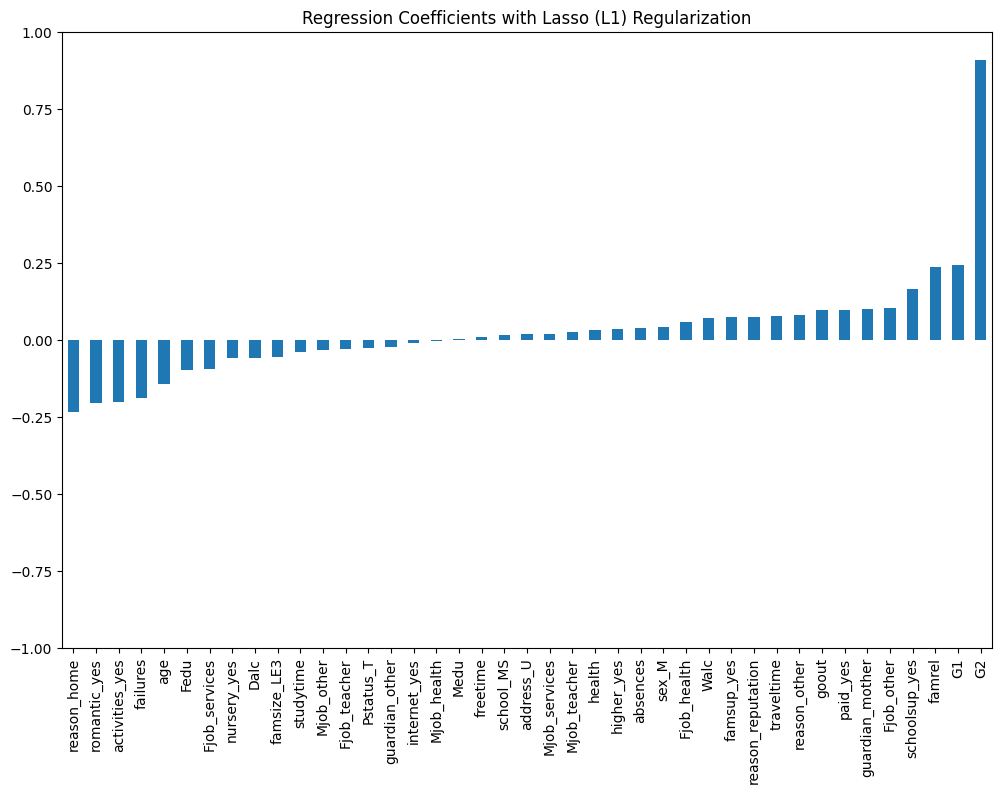

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("./student_math.csv")
y = df['Final_Grade']
X = df.drop(columns = ['Final_Grade'])

# 1. Train-test split and fitting an l2-regularized regression model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
ridge = Ridge(alpha = 100)
ridge.fit(X_train, y_train)

#Training error
l2_pred_train = ridge.predict(X_train)
l2_mse_train = np.mean((l2_pred_train - y_train)**2)
print("Ridge (L2) Training Error: ", l2_mse_train)

# 2. Calculate testing error
l2_pred_test = ridge.predict(X_test)
l2_mse_test = np.mean((l2_pred_test - y_test)**2)
print("Ridge (L2) Testing Error: ", l2_mse_test)


# 3. Plotting the Coefficients
predictors = X.columns
coef = pd.Series(ridge.coef_,predictors).sort_values()
plt.figure(figsize = (12,8))
plt.ylim(-1.0,1.0)
coef.plot(kind='bar', title='Regression Coefficients with Lasso (L1) Regularization')
plt.show()